# import 리스트

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import statsmodels.api as sm
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [ ]:
import requests

# API 엔드포인트와 요청 매개변수 설정
url = "https://api.upbit.com/v1/market/all"

# API 요청
response = requests.get(url)

# 응답 데이터 처리
if response.status_code == 200:
    data = response.json()
    # 데이터 활용
    print(data)
else:
    print("API 요청 실패:", response.status_code)

[{'market': 'KRW-BTC', 'korean_name': '비트코인', 'english_name': 'Bitcoin'}, {'market': 'KRW-ETH', 'korean_name': '이더리움', 'english_name': 'Ethereum'}, {'market': 'BTC-ETH', 'korean_name': '이더리움', 'english_name': 'Ethereum'}, {'market': 'BTC-XRP', 'korean_name': '리플', 'english_name': 'Ripple'}, {'market': 'BTC-ETC', 'korean_name': '이더리움클래식', 'english_name': 'Ethereum Classic'}, {'market': 'BTC-CVC', 'korean_name': '시빅', 'english_name': 'Civic'}, {'market': 'BTC-DGB', 'korean_name': '디지바이트', 'english_name': 'DigiByte'}, {'market': 'BTC-SC', 'korean_name': '시아코인', 'english_name': 'Siacoin'}, {'market': 'BTC-SNT', 'korean_name': '스테이터스네트워크토큰', 'english_name': 'Status Network Token'}, {'market': 'BTC-WAVES', 'korean_name': '웨이브', 'english_name': 'Waves'}, {'market': 'BTC-NMR', 'korean_name': '뉴메레르', 'english_name': 'Numeraire'}, {'market': 'BTC-XEM', 'korean_name': '넴', 'english_name': 'NEM'}, {'market': 'BTC-QTUM', 'korean_name': '퀀텀', 'english_name': 'Qtum'}, {'market': 'BTC-BAT', 'korean_na

# 데이터 정리

In [84]:
import os
os.chdir('C:/Users/user')
# os.mkdir('Project3')
os.chdir('Project3/')

import pandas as pd
df = pd.read_csv('bitcoin_1mdata.csv')
df

data_backup_1 = df.iloc[:, :5].copy()
data = data_backup_1.copy()

data['open_time'] = pd.to_datetime(data['open_time'])
test = data[data['open_time']>'2023']
data = data[data['open_time']<'2023']

In [81]:
data['year'] = data['open_time'].dt.year
data['month'] = data['open_time'].dt.month
data['day'] = data['open_time'].dt.day
data = data.drop(columns='open_time')

In [86]:
data = data.set_index('open_time')

In [50]:
data

,open_time,open,high,low,close
0,2021-03-01 00:55:00,46325.90,46442.23,46257.92,46262.16
1,2021-03-01 00:56:00,46262.16,46268.90,46202.90,46211.83
2,2021-03-01 00:57:00,46211.83,46282.74,46200.00,46229.61
3,2021-03-01 00:58:00,46233.83,46240.04,46200.00,46203.62
4,2021-03-01 00:59:00,46203.67,46250.00,46150.00,46217.19
...,...,...,...,...,...
962386,2022-12-31 23:55:00,16540.42,16540.92,16537.71,16539.28
962387,2022-12-31 23:56:00,16538.65,16540.53,16538.38,16540.52
962388,2022-12-31 23:57:00,16540.52,16540.79,16535.05,16537.78
962389,2022-12-31 23:58:00,16537.78,16538.81,16536.42,16536.42


In [51]:
test

,open_time,open,high,low,close
962392,2023-01-01 00:01:00,16543.04,16544.41,16538.48,16539.31
962393,2023-01-01 00:02:00,16539.31,16541.17,16534.52,16536.43
962394,2023-01-01 00:03:00,16536.43,16537.28,16531.00,16533.65
962395,2023-01-01 00:04:00,16534.12,16536.08,16527.51,16535.38
962396,2023-01-01 00:05:00,16534.91,16537.80,16533.94,16536.70
...,...,...,...,...,...
1195666,2023-06-13 23:55:00,25910.00,25913.04,25908.10,25911.96
1195667,2023-06-13 23:56:00,25911.95,25927.77,25911.95,25926.59
1195668,2023-06-13 23:57:00,25926.59,25926.60,25920.00,25921.95
1195669,2023-06-13 23:58:00,25921.94,25921.95,25920.50,25920.51


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

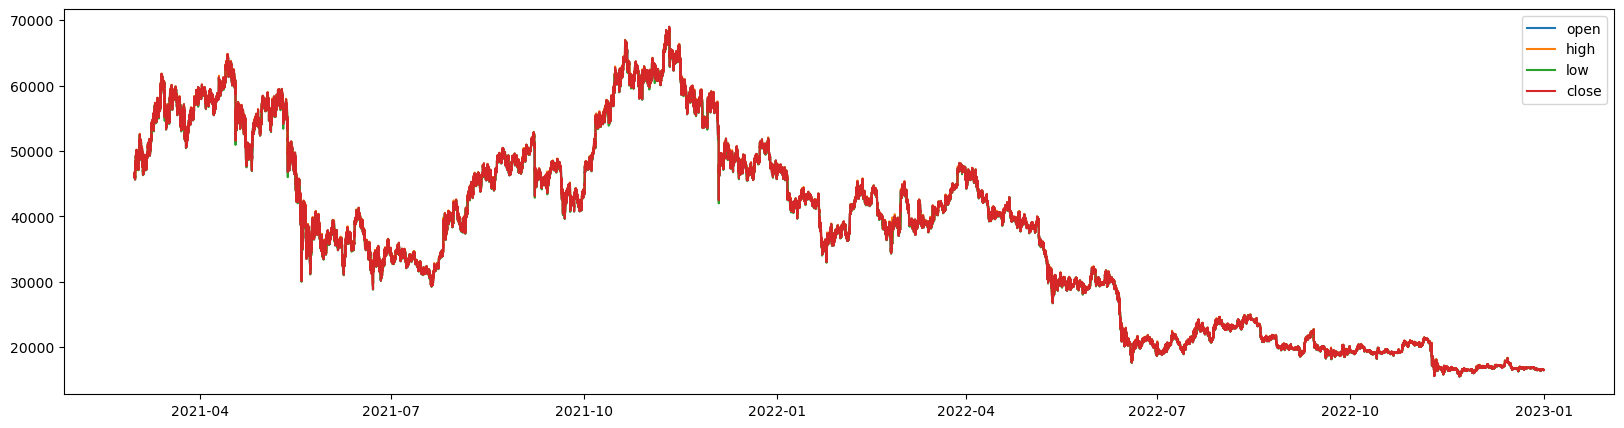

In [7]:
plt.figure(figsize=(20,5))
plt.plot(data.iloc[:,0], data.iloc[:,1], label = 'open')
plt.plot(data.iloc[:,0], data.iloc[:,2], label = 'high')
plt.plot(data.iloc[:,0], data.iloc[:,3], label = 'low')
plt.plot(data.iloc[:,0], data.iloc[:,4], label = 'close')
plt.legend()
plt.show()

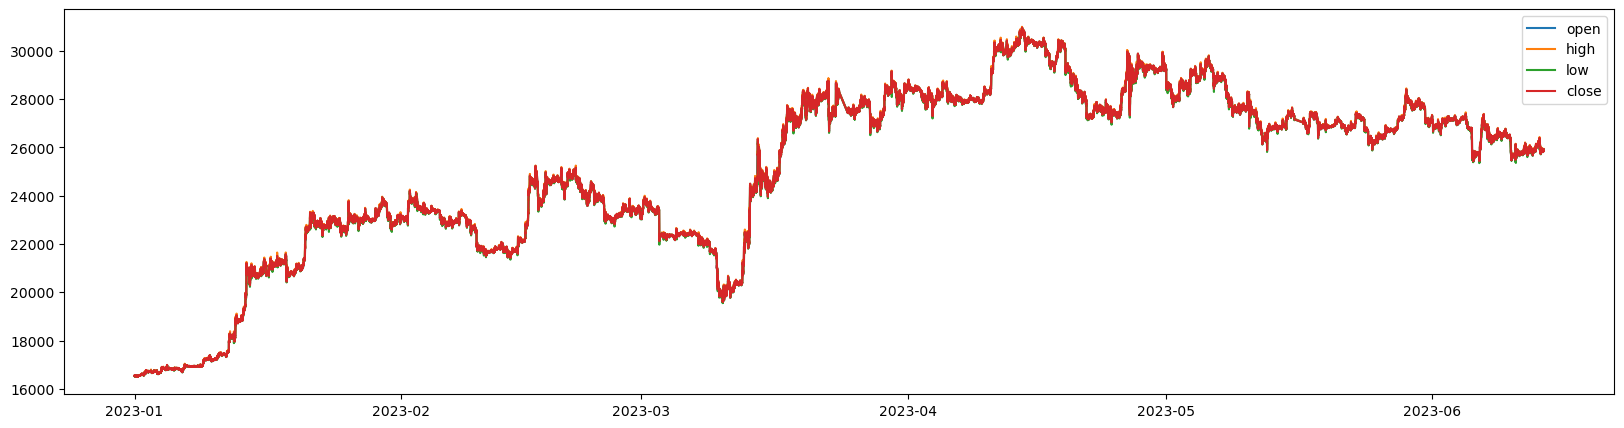

In [10]:
plt.figure(figsize=(20,5))
plt.plot(test.iloc[:,0], test.iloc[:,1], label = 'open', )
plt.plot(test.iloc[:,0], test.iloc[:,2], label = 'high')
plt.plot(test.iloc[:,0], test.iloc[:,3], label = 'low')
plt.plot(test.iloc[:,0], test.iloc[:,4], label = 'close')
plt.legend()
plt.show()

# 시계열 분해

In [17]:
data

,open_time,open,high,low,close
0,2021-03-01 00:55:00,46325.90,46442.23,46257.92,46262.16
1,2021-03-01 00:56:00,46262.16,46268.90,46202.90,46211.83
2,2021-03-01 00:57:00,46211.83,46282.74,46200.00,46229.61
3,2021-03-01 00:58:00,46233.83,46240.04,46200.00,46203.62
4,2021-03-01 00:59:00,46203.67,46250.00,46150.00,46217.19
...,...,...,...,...,...
962386,2022-12-31 23:55:00,16540.42,16540.92,16537.71,16539.28
962387,2022-12-31 23:56:00,16538.65,16540.53,16538.38,16540.52
962388,2022-12-31 23:57:00,16540.52,16540.79,16535.05,16537.78
962389,2022-12-31 23:58:00,16537.78,16538.81,16536.42,16536.42


In [18]:
type(data['open_time'][0])

pandas._libs.tslibs.timestamps.Timestamp

## 가법모형

In [27]:
dates

0        2021-03-01 00:55:00
1        2021-03-01 00:56:00
2        2021-03-01 00:57:00
3        2021-03-01 00:58:00
4        2021-03-01 00:59:00
                 ...        
962386   2022-12-31 23:55:00
962387   2022-12-31 23:56:00
962388   2022-12-31 23:57:00
962389   2022-12-31 23:58:00
962390   2022-12-31 23:59:00
Name: open_time, Length: 962391, dtype: datetime64[ns]

In [28]:
values

0         46262.16
1         46211.83
2         46229.61
3         46203.62
4         46217.19
            ...   
962386    16539.28
962387    16540.52
962388    16537.78
962389    16536.42
962390    16542.40
Name: close, Length: 962391, dtype: float64

In [29]:
pd.DataFrame(data=dates,values)

,open_time
close,
46262.16,NaT
46211.83,NaT
46229.61,NaT
46203.62,NaT
46217.19,NaT
...,...
16539.28,NaT
16540.52,NaT
16537.78,NaT


In [44]:
365*24

8760

In [49]:
data.index

DatetimeIndex(['2021-03-01 00:55:00', '2021-03-01 00:56:00',
               '2021-03-01 00:57:00', '2021-03-01 00:58:00',
               '2021-03-01 00:59:00', '2021-03-01 01:00:00',
               '2021-03-01 01:01:00', '2021-03-01 01:02:00',
               '2021-03-01 01:03:00', '2021-03-01 01:04:00',
               ...
               '2022-12-31 23:50:00', '2022-12-31 23:51:00',
               '2022-12-31 23:52:00', '2022-12-31 23:53:00',
               '2022-12-31 23:54:00', '2022-12-31 23:55:00',
               '2022-12-31 23:56:00', '2022-12-31 23:57:00',
               '2022-12-31 23:58:00', '2022-12-31 23:59:00'],
              dtype='datetime64[ns]', name='open_time', length=962391, freq=None)

In [64]:
962390/2

481195.0

In [59]:
# 시계열 데이터 로드
data['open_time'] = pd.to_datetime(data['open_time'])  # Convert 'date' column to datetime format
data.set_index('open_time', inplace=True)  # Set 'date' column as index
values = data['close']  # Replace 'close' with the actual column name containing close prices

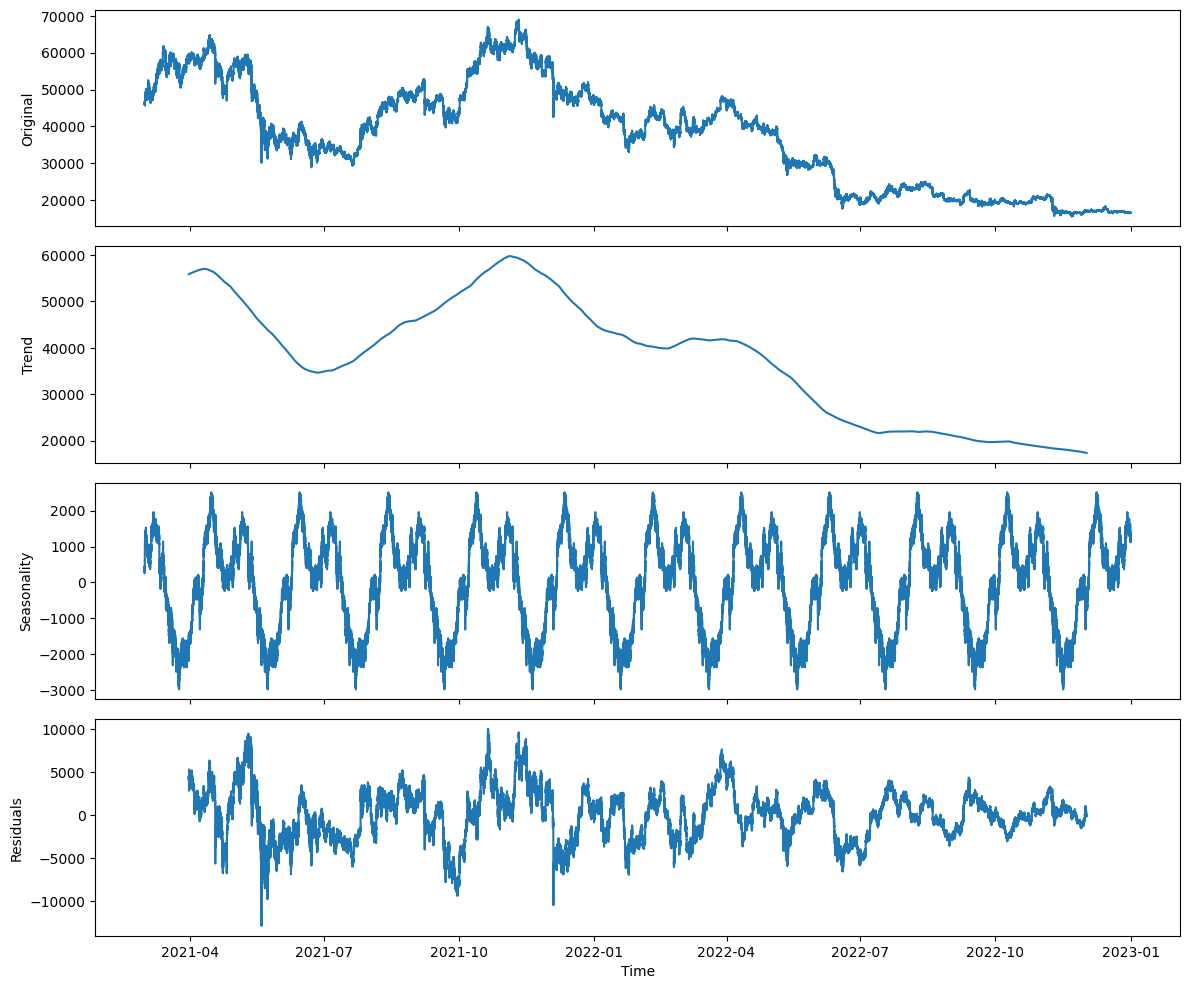

In [83]:
# 가법 모형

# 시계열 분해
result = sm.tsa.seasonal_decompose(values, model='additive',period = 60*24*30*2) # period = 2 months

# 분해 결과 추출
seasonality = result.seasonal
trend = result.trend
residuals = result.resid

# 시계열 분해 그래프
fig, axes = plt.subplots(4, 1, figsize=(12, 10), sharex=True)

axes[0].plot(data.index, values)
axes[0].set_ylabel('Original')

axes[1].plot(data.index, trend)
axes[1].set_ylabel('Trend')

axes[2].plot(data.index, seasonality)
axes[2].set_ylabel('Seasonality')

axes[3].plot(data.index, residuals)
axes[3].set_ylabel('Residuals')

plt.xlabel('Time')
plt.tight_layout()
plt.show()

# 로그가법모형

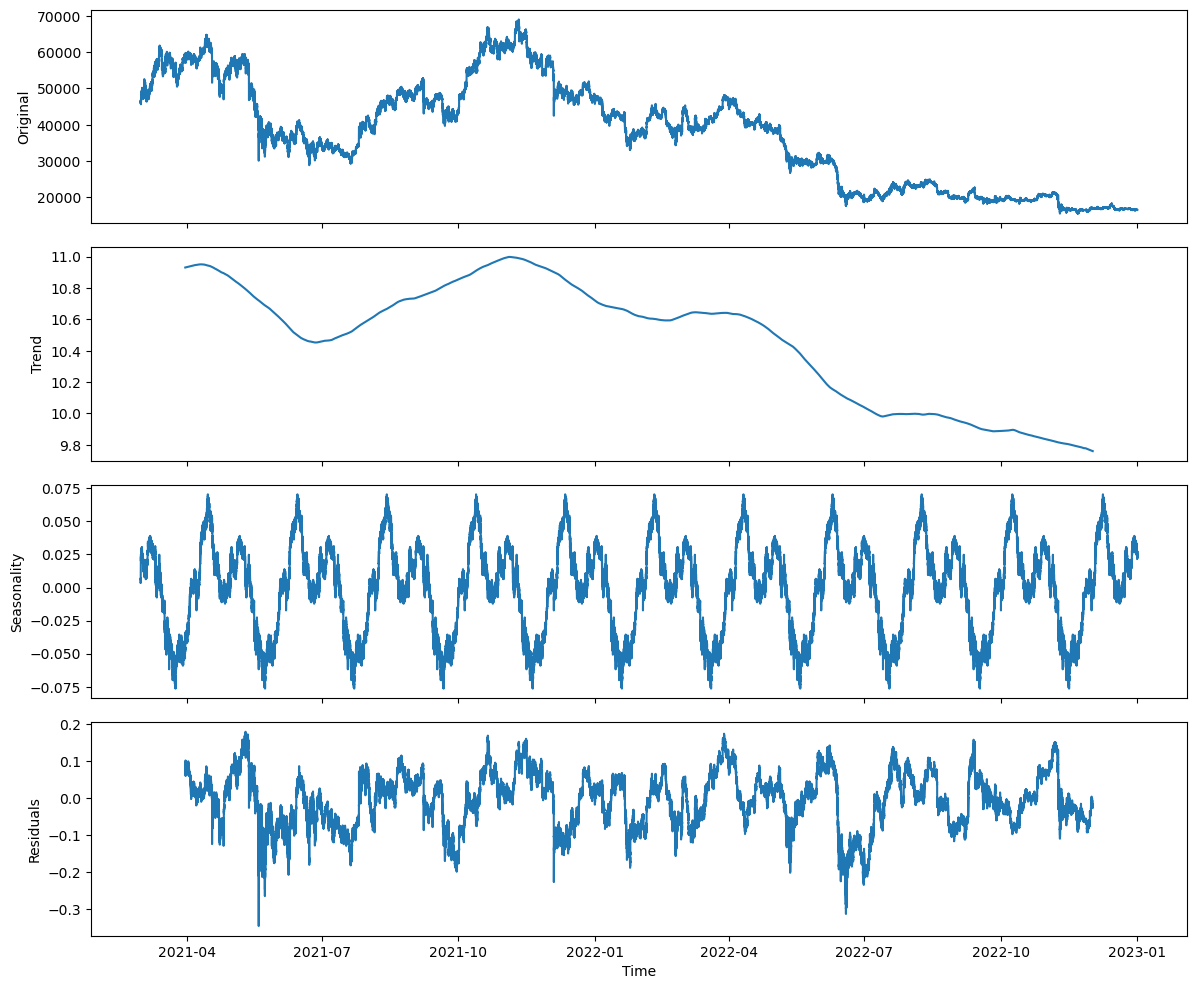

In [82]:
# 로그가법모형

# 시계열 분해
result = sm.tsa.seasonal_decompose(values, model='multiplicative',period = 60*24*30*2) # period = 2 months

# 분해 결과 추출
seasonality = np.log(result.seasonal)
trend = np.log(result.trend)
residuals = np.log(result.resid)

# 시계열 분해 그래프
fig, axes = plt.subplots(4, 1, figsize=(12, 10), sharex=True)

axes[0].plot(data.index, values)
axes[0].set_ylabel('Original')

axes[1].plot(data.index, trend)
axes[1].set_ylabel('Trend')

axes[2].plot(data.index, seasonality)
axes[2].set_ylabel('Seasonality')

axes[3].plot(data.index, residuals)
axes[3].set_ylabel('Residuals')

plt.xlabel('Time')
plt.tight_layout()
plt.show()

open_time
2021-03-01 00:55:00    46325.90
2021-03-01 00:56:00    46262.16
2021-03-01 00:57:00    46211.83
2021-03-01 00:58:00    46233.83
2021-03-01 00:59:00    46203.67
                         ...   
2022-12-31 23:55:00    16540.42
2022-12-31 23:56:00    16538.65
2022-12-31 23:57:00    16540.52
2022-12-31 23:58:00    16537.78
2022-12-31 23:59:00    16536.81
Name: open, Length: 962391, dtype: float64

# 승법모형

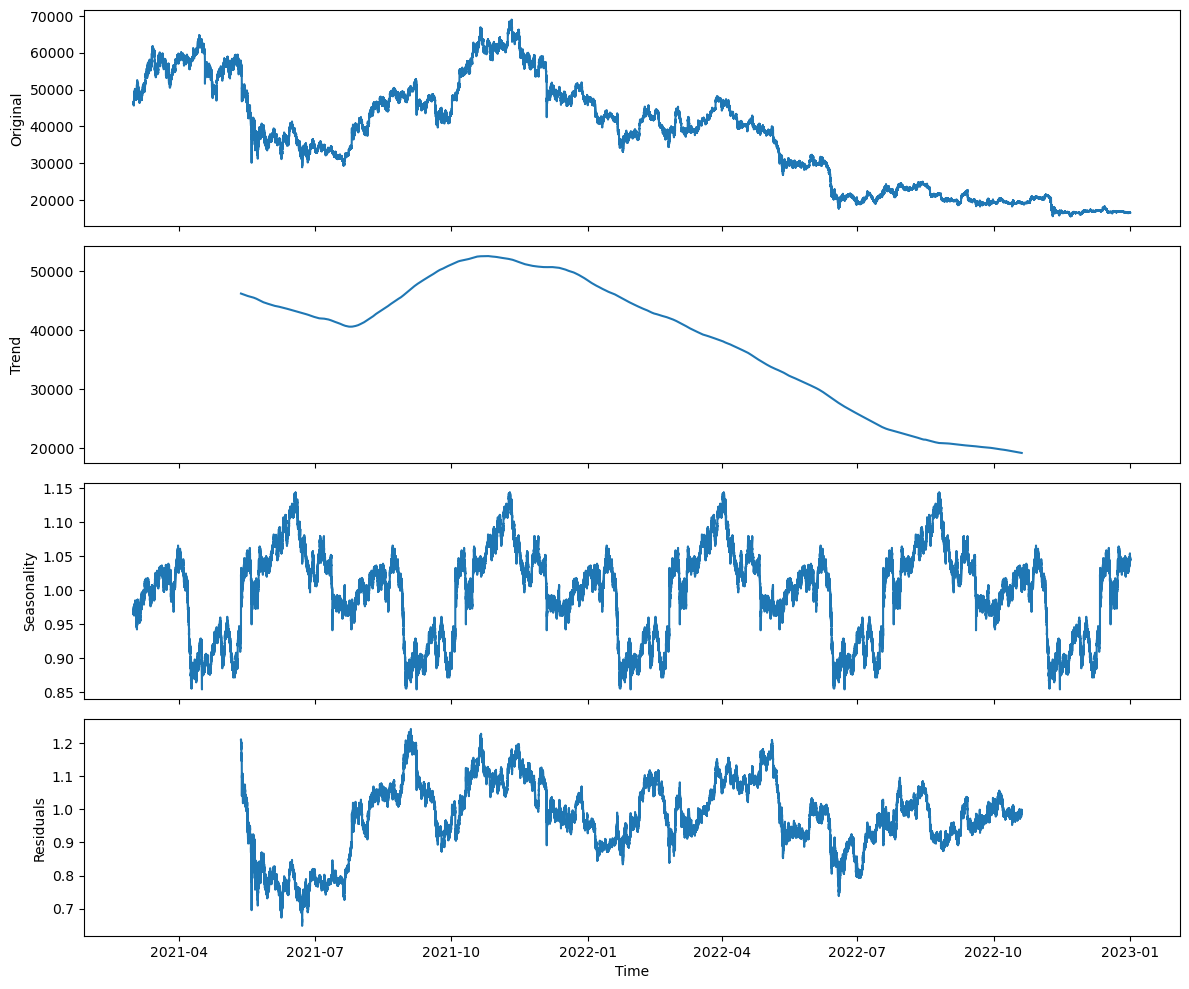

In [70]:
# 시계열 분해
result = sm.tsa.seasonal_decompose(values, model='multiplicative',period = 60*24*30*2) # period = 2 months

# 분해 결과 추출
seasonality = result.seasonal
trend = result.trend
residuals = result.resid

# 시계열 분해 그래프
fig, axes = plt.subplots(4, 1, figsize=(12, 10), sharex=True)

axes[0].plot(data.index, values)
axes[0].set_ylabel('Original')

axes[1].plot(data.index, trend)
axes[1].set_ylabel('Trend')

axes[2].plot(data.index, seasonality)
axes[2].set_ylabel('Seasonality')

axes[3].plot(data.index, residuals)
axes[3].set_ylabel('Residuals')

plt.xlabel('Time')
plt.tight_layout()
plt.show()

In [46]:
dates = pd.to_datetime(data['open_time'])  # Replace 'date_column' with the actual column name containing dates
values = data['close']  # Replace 'value_column' with the actual column name containing values

# 시계열 분해
result = sm.tsa.seasonal_decompose(values, model='additive')  # multiplicative

# 분해 결과 추출
seasonality = result.seasonal
trend = result.trend
residuals = result.resid

# 시각화
fig, axes = plt.subplots(4, 1, figsize=(12, 10), sharex=True)

axes[0].plot(dates, values)
axes[0].set_ylabel('Original')

axes[1].plot(dates, trend)
axes[1].set_ylabel('Trend')

axes[2].plot(dates, seasonality)
axes[2].set_ylabel('Seasonality')

axes[3].plot(dates, residuals)
axes[3].set_ylabel('Residuals')

plt.xlabel('Time')
plt.tight_layout()
plt.show()

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

# ACF

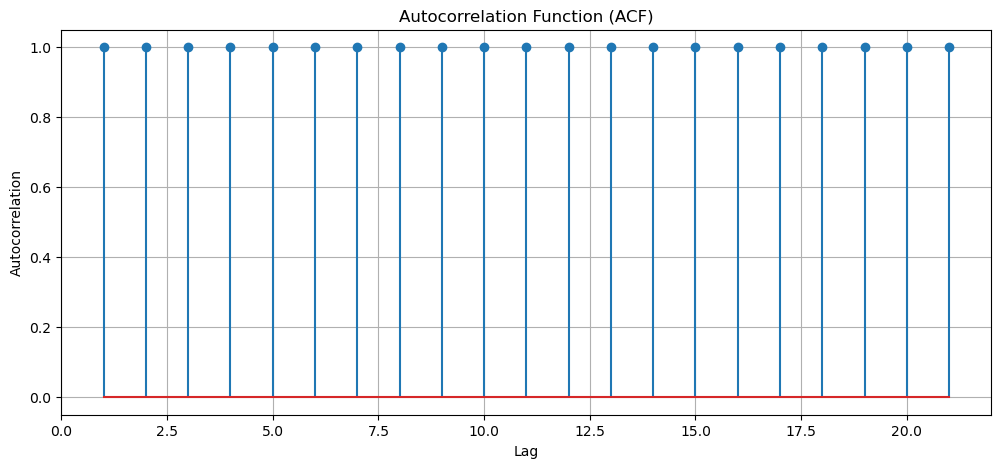

In [9]:
values = data['close'].values  # Replace 'column_name' with the actual column name in your data

# Calculate ACF values
acf_values = sm.tsa.stattools.acf(values, nlags=20)  # Set the desired number of lags

# Plot PACF graph
plt.figure(figsize=(12, 5))
plt.stem(range(1, len(acf_values) + 1), acf_values)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF)')
plt.grid(True)
plt.show()

# PACF

In [8]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [ ]:
data_cleaned = data

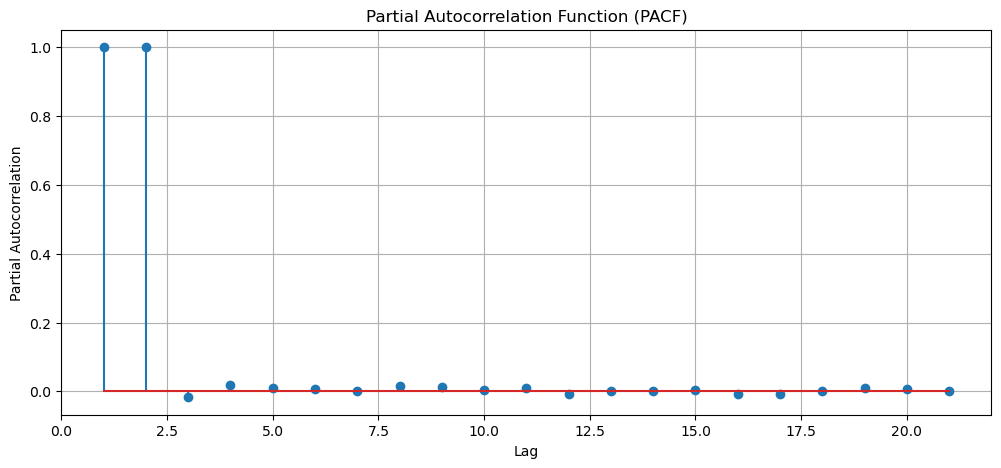

In [69]:
values = data['close'].values  # Replace 'column_name' with the actual column name in your data

# Calculate PACF values
pacf_values = sm.tsa.stattools.pacf(values, nlags=20)  # Set the desired number of lags

# Plot PACF graph
plt.figure(figsize=(12, 5))
plt.stem(range(1, len(pacf_values) + 1), pacf_values)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF)')
plt.grid(True)
plt.show()

In [59]:
data['open_time'] = data['open_time'].astype(str)

C:\Users\user\AppData\Local\Temp\ipykernel_3964\749576514.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['open_time'] = data['open_time'].astype(str)


# 1차 차분

In [11]:
diff_data = data['close'].diff().dropna()  # Replace 'column_name' with the actual column name in your data

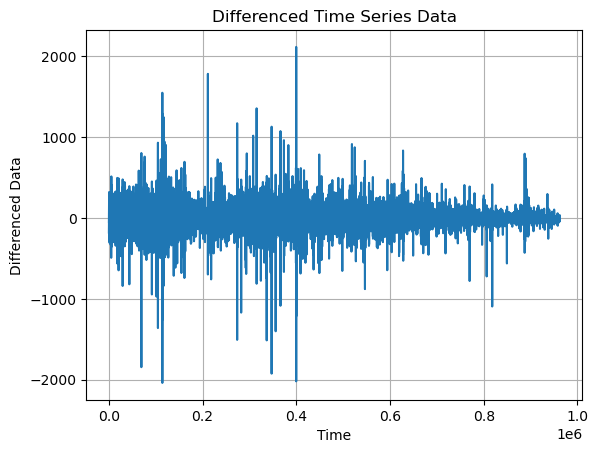

In [11]:
# 차분된 데이터 시각화
plt.plot(diff_data)
plt.xlabel('Time')
plt.ylabel('Differenced Data')
plt.title('Differenced Time Series Data')
plt.grid(True)
plt.show()

# 1차 차분 acf

In [13]:
diff_data

1        -50.33
2         17.78
3        -25.99
4         13.57
5         51.31
          ...  
962386    -1.14
962387     1.24
962388    -2.74
962389    -1.36
962390     5.98
Name: close, Length: 962390, dtype: float64

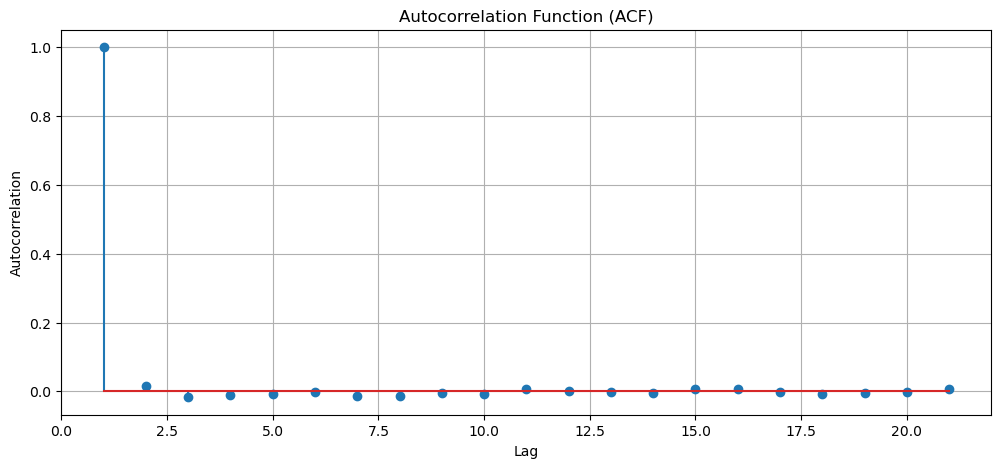

In [14]:
values = diff_data.values  # Replace 'column_name' with the actual column name in your data

# Calculate ACF values
acf_values = sm.tsa.stattools.acf(values, nlags=20)  # Set the desired number of lags

# Plot PACF graph
plt.figure(figsize=(12, 5))
plt.stem(range(1, len(acf_values) + 1), acf_values)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF)')
plt.grid(True)
plt.show()

# 1차 차분 pacf

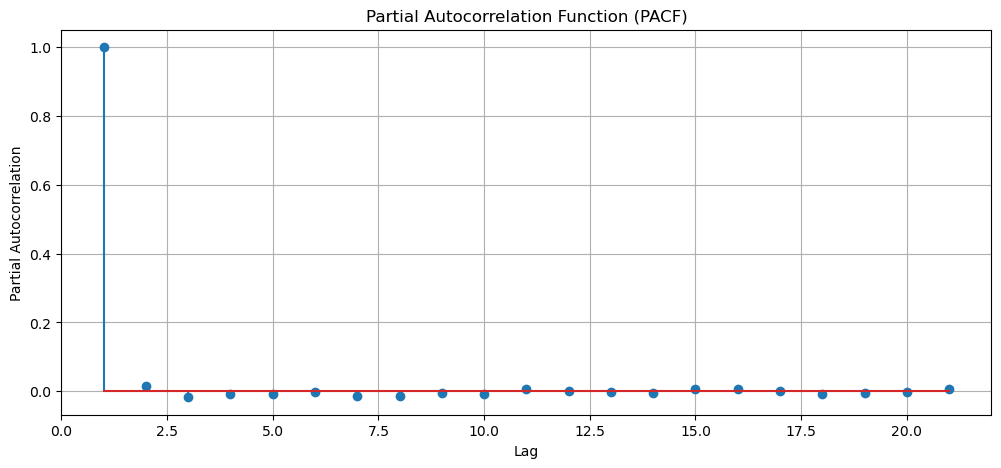

In [15]:
values = diff_data.values  # Replace 'column_name' with the actual column name in your data

# Calculate PACF values
pacf_values = sm.tsa.stattools.pacf(values, nlags=20)  # Set the desired number of lags

# Plot PACF graph
plt.figure(figsize=(12, 5))
plt.stem(range(1, len(pacf_values) + 1), pacf_values)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF)')
plt.grid(True)
plt.show()

# 2차 차분

# 외부에서 데이터 가져오기

In [153]:
import pandas as pd
data = pd.read_csv('all_data.csv', index_col=0)
# data['ds'] = pd.to_datetime(data['ds'])

In [154]:
import datetime

# 시리즈의 각 날짜 값을 Unix 시간으로 변환하는 함수
def convert_to_unix_timestamp(date_string):
    date_object = datetime.datetime.strptime(date_string, '%Y-%m-%d')
    unix_timestamp = int(date_object.timestamp())
    return unix_timestamp

# 시리즈에 함수를 적용하여 Unix 시간으로 변환
data['unix_date'] = data['ds'].apply(convert_to_unix_timestamp)
data = data.drop(columns= 'ds')

In [149]:
# 모델 값 확인 테스트용 데이터 정제 
data = data['gold_Open']
data

0       1236.199951
1       1216.199951
2       1218.300049
3       1214.900024
4       1214.900024
           ...     
3173    1948.199951
3174    1942.699951
3175    1942.699951
3176    1942.699951
3177    1942.699951
Name: gold_Open, Length: 3178, dtype: float64

In [4]:
data.columns

Index(['IR_Open', 'gold_Open', 'BTC_Open', 'oil_Open', 'mac_Open', 'CU_Open',
       'IR_High', 'IR_Low', 'IR_Close', 'gold_High', 'gold_Low', 'IR_Close.1',
       'gold_Volume', 'BTC_High', 'BTC_Low', 'BTC_Close', 'BTC_Volume',
       'oil_High', 'oil_Low', 'oil_Close', 'oil_Volume', 'mac_High', 'mac_Low',
       'mac_Close', 'mac_Volume', 'CU_High', 'CU_Low', 'CU_Close', 'CU_Volume',
       'year', 'month', 'day'],
      dtype='object')

# DNN 모델 적용

In [41]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# 데이터 로드
# features: 피처들의 데이터 (2차원 배열, shape=(3178, 29))
# targets: 타겟 변수의 데이터 (1차원 배열, shape=(3178,))
features = data
targets = data['gold_Open'] # 비트코인의 종가

In [42]:
# 시계열 데이터로 변환
def create_sequence_data(features, targets, sequence_length):
    X, y = [], []
    for i in range(len(features) - sequence_length):
        X.append(features[i:i+sequence_length])
        y.append(targets[i+sequence_length])
    return np.array(X), np.array(y)

In [43]:
# 데이터 분할
sequence_length = 10
X, y = create_sequence_data(features, targets, sequence_length)

num_sep = int(len(features)*0.8)
X_train = X[:num_sep]
X_test = X[num_sep:]
y_train = y[:num_sep]
y_test = y[num_sep:]

In [44]:
X_train.shape

(2542, 10, 32)

In [45]:
# 데이터 스케일링
scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train.reshape(-1, features.shape[1]))
# X_test_scaled = scaler.transform(X_test.reshape(-1, features.shape[1]))

X_train_scaled = scaler.fit_transform(X_train.reshape(-1, features.shape[1])).reshape(-1, sequence_length, features.shape[1])
X_test_scaled = scaler.transform(X_test.reshape(-1, features.shape[1])).reshape(-1, sequence_length, features.shape[1])

In [46]:
X_train_scaled.shape

(2542, 10, 32)

In [47]:
# DNN 모델 구성
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(sequence_length, features.shape[1])),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

In [48]:
# 모델 컴파일
model.compile(optimizer='adam', loss='mse')

# 모델 학습
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32)

Epoch 1/10
80/80 [==============================] - 1s 1ms/step - loss: 1959396.2500
Epoch 2/10
80/80 [==============================] - 0s 1ms/step - loss: 1627349.0000
Epoch 3/10
80/80 [==============================] - 0s 1ms/step - loss: 831120.7500
Epoch 4/10
80/80 [==============================] - 0s 1ms/step - loss: 321778.7500
Epoch 5/10
80/80 [==============================] - 0s 1ms/step - loss: 238507.9531
Epoch 6/10
80/80 [==============================] - 0s 1ms/step - loss: 216746.0156
Epoch 7/10
80/80 [==============================] - 0s 1ms/step - loss: 198288.4062
Epoch 8/10
80/80 [==============================] - 0s 1ms/step - loss: 179830.3438
Epoch 9/10
80/80 [==============================] - 0s 1ms/step - loss: 163008.4531
Epoch 10/10
80/80 [==============================] - 0s 1ms/step - loss: 147048.7812


In [49]:
model.evaluate(X_test,y_test)

20/20 [==============================] - 0s 928us/step - loss: 8120643546411740218523648.0000


8.12064354641174e+24

## 다른 코드

In [29]:
# 데이터 로드
# features: 피처들의 데이터 (2차원 배열, shape=(3178, 29))
# targets: 타겟 변수의 데이터 (1차원 배열, shape=(3178,))
features = data
targets = data['gold_Open']

# 시계열 데이터로 변환
def create_sequence_data(features, targets, sequence_length):
    X, y = [], []
    for i in range(len(features) - sequence_length):
        X.append(features[i:i+sequence_length])
        y.append(targets[i+sequence_length])
    return np.array(X), np.array(y)

In [30]:
# 데이터 분할
# import sklearn.model_selection.train_test_split
# sequence_length = 10
# X, y = create_sequence_data(features, targets, sequence_length)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# 데이터 분할
sequence_length = 10
X, y = create_sequence_data(features, targets, sequence_length)

num_sep = int(len(features)*0.8)
X_train = X[:num_sep]
X_test = X[num_sep:]
y_train = y[:num_sep]
y_test = y[num_sep:]

In [31]:
# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape(-1, features.shape[1])).reshape(-1, sequence_length, features.shape[1])
X_test_scaled = scaler.transform(X_test.reshape(-1, features.shape[1])).reshape(-1, sequence_length, features.shape[1])

# DNN 모델 구성
# 일부러 층 많이 늘려봄.
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(sequence_length, features.shape[1])),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

# 모델 컴파일
model.compile(optimizer='adam', loss='mse')

# 모델 학습
model.fit(X_train_scaled, y_train, epochs=10,
          batch_size=32, validation_data=(X_test_scaled, y_test),
         verbose=False)

# 모델 평가
mse = model.evaluate(X_test_scaled, y_test)
print('평균 제곱 오차 (MSE):', mse)

20/20 [==============================] - 0s 1ms/step - loss: 639437.9375
평균 제곱 오차 (MSE): 639437.9375


In [32]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(sequence_length, features.shape[1])),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

# 모델 컴파일
model.compile(optimizer='adam', loss='mse')

model.fit(X_train_scaled, y_train, epochs=10,
          batch_size=32, validation_data=(X_test_scaled, y_test),
         verbose=False)

mse = model.evaluate(X_test_scaled, y_test)
print('평균 제곱 오차 (MSE):', mse)

20/20 [==============================] - 0s 964us/step - loss: 397151.1250
평균 제곱 오차 (MSE): 397151.125


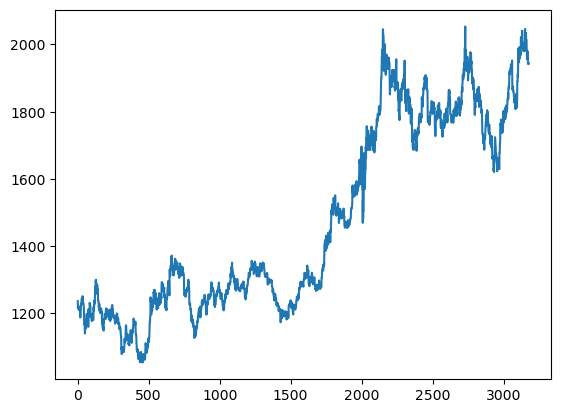

In [35]:
import matplotlib.pyplot as plt
plt.plot(targets)

# CNN 모델 적용

In [34]:
# 시계열 데이터로 변환
def create_sequence_data(features, targets, sequence_length):
    X, y = [], []
    for i in range(len(features) - sequence_length):
        X.append(features[i:i+sequence_length])
        y.append(targets[i+sequence_length])
    return np.array(X), np.array(y)
from sklearn.model_selection import train_test_split
# 데이터 분할
sequence_length = 10
X, y = create_sequence_data(features, targets, sequence_length)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape(-1, features.shape[1])).reshape(-1, sequence_length, features.shape[1])
X_test_scaled = scaler.transform(X_test.reshape(-1, features.shape[1])).reshape(-1, sequence_length, features.shape[1])

# CNN 모델 구성
model = keras.Sequential([
    keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(sequence_length, features.shape[1])),
    keras.layers.MaxPooling1D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(16, activation='relu'),  
    keras.layers.Dense(1)
])

# 모델 컴파일
model.compile(optimizer='adam', loss='mse')

# 모델 학습
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32,
          validation_data=(X_test_scaled, y_test),
         verbose=False)

# 모델 평가
mse = model.evaluate(X_test_scaled, y_test)
print('평균 제곱 오차 (MSE):', mse)

20/20 [==============================] - 0s 895us/step - loss: 762613.3125
평균 제곱 오차 (MSE): 762613.3125


# RNN 모델적용

In [194]:
from tensorflow.keras.layers import SimpleRNN

In [120]:
data

,IR_Open,gold_Open,BTC_Open,oil_Open,mac_Open,CU_Open,IR_High,IR_Low,IR_Close,gold_High,...,oil_Volume,mac_High,mac_Low,mac_Close,mac_Volume,CU_High,CU_Low,CU_Close,CU_Volume,unix_date
0,2.578,1236.199951,465.864014,94.709999,496.00,3.1495,2.616,2.551,2.600,1236.199951,...,305832.0,501.50,494.25,499.25,33011.0,3.1495,3.1285,3.1415,223.0,1410879600
1,2.625,1216.199951,456.859985,93.970001,496.25,3.1270,2.642,2.616,2.629,1225.699951,...,170772.0,498.75,487.75,488.50,33252.0,3.1275,3.0915,3.0925,199.0,1410966000
2,2.611,1218.300049,424.102997,92.970001,487.75,3.0880,2.629,2.582,2.587,1218.300049,...,92780.0,488.25,473.75,474.50,45467.0,3.1005,3.0770,3.0885,225.0,1411052400
3,2.562,1214.900024,394.673004,92.220001,476.25,3.0590,2.578,2.547,2.566,1216.800049,...,229232.0,480.75,469.50,476.75,61856.0,3.0590,3.0295,3.0380,373.0,1411138800
4,2.562,1214.900024,408.084991,92.220001,476.25,3.0590,2.578,2.547,2.566,1216.800049,...,229232.0,480.75,469.50,476.75,61856.0,3.0590,3.0295,3.0380,373.0,1411225200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3173,3.789,1948.199951,26474.181641,71.889999,606.00,3.6050,3.859,3.777,3.810,1948.400024,...,261498.0,618.50,602.50,616.00,48350.0,3.6735,3.6050,3.6735,660.0,1685026800
3174,3.712,1942.699951,26720.181641,73.230003,616.75,3.6670,3.754,3.685,3.700,1962.599976,...,440862.0,616.75,588.75,591.00,74481.0,3.6800,3.6325,3.6580,1442.0,1685113200
3175,3.712,1942.699951,26871.158203,73.230003,616.75,3.6670,3.754,3.685,3.700,1962.599976,...,440862.0,616.75,588.75,591.00,74481.0,3.6800,3.6325,3.6580,1442.0,1685199600
3176,3.712,1942.699951,28075.591797,73.230003,616.75,3.6670,3.754,3.685,3.700,1962.599976,...,440862.0,616.75,588.75,591.00,74481.0,3.6800,3.6325,3.6580,1442.0,1685286000


In [220]:
# 데이터 정규화
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# 훈련 데이터와 테스트 데이터 분할
train_size = int(len(data_scaled) * 0.8)
train_data = data_scaled[:train_size]
test_data = data_scaled[train_size:]

# X와 y 분할
def split_sequence(sequence, n_steps):
    X, y = [], []
    for i in range(len(sequence) - n_steps):
        X.append(sequence[i:i+n_steps,:])
        y.append(sequence[i+n_steps,:])
    return np.array(X), np.array(y)

n_steps = 10  # 시퀀스 길이 설정
X_train, y_train = split_sequence(train_data, n_steps)
X_test, y_test = split_sequence(test_data, n_steps)

# LSTM 모델 구축
model = Sequential()
model.add(SimpleRNN(50, activation='relu', input_shape=(n_steps, 30)))
model.add(Dense(30))
model.compile(optimizer='rmsprop', loss='mse')

# 모델 훈련
model.fit(X_train, y_train, epochs=10, batch_size=32)

# 예측 수행
y_pred = model.predict(X_test)

Epoch 1/10
80/80 [==============================] - 1s 2ms/step - loss: 0.0260
Epoch 2/10
80/80 [==============================] - 0s 2ms/step - loss: 0.0059
Epoch 3/10
80/80 [==============================] - 0s 2ms/step - loss: 0.0042
Epoch 4/10
80/80 [==============================] - 0s 2ms/step - loss: 0.0035
Epoch 5/10
80/80 [==============================] - 0s 2ms/step - loss: 0.0029
Epoch 6/10
80/80 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 7/10
80/80 [==============================] - 0s 2ms/step - loss: 0.0023
Epoch 8/10
80/80 [==============================] - 0s 2ms/step - loss: 0.0021
Epoch 9/10
80/80 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 10/10
20/20 [==============================] - 0s 1ms/step


In [221]:
# 예측 결과 역정규화
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

In [222]:
# 데이터프레임으로 만들기
test_df_rnn = pd.DataFrame(data = y_test, columns=data.columns)
pred_df_rnn = pd.DataFrame(data = y_pred, columns=data.columns)

In [223]:
# 오차 확인
np.subtract(pred_df_rnn['BTC_Close'], test_df_rnn['BTC_Close'])

0      -650.148438
1      1374.019531
2      -649.156250
3      -795.550781
4      3110.996094
          ...     
621    1656.519531
622    6362.392578
623   -1600.667969
624    1802.207031
625    3103.658203
Name: BTC_Close, Length: 626, dtype: float64

In [224]:
# mae ; RNN
# mean(abs(pred - test))
np.mean(np.absolute(np.subtract(pred_df_rnn['BTC_Close'], test_df_rnn['BTC_Close'])))

5818.325616513578

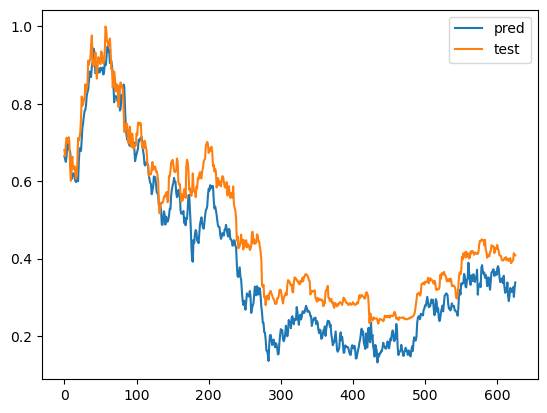

In [198]:
plt.plot(pred_df_rnn['BTC_Close'], label = 'pred')
plt.plot(test_df_rnn['BTC_Close'], label = 'test')
plt.legend()

# LSTM 모델 적용

In [170]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# # 데이터 로드
# data = pd.read_csv('stock_prices.csv')

# # 날짜 칼럼 제거
# data = data.drop('Date', axis=1)

# 데이터 정규화
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# 훈련 데이터와 테스트 데이터 분할
train_size = int(len(data_scaled) * 0.8)
train_data = data_scaled[:train_size]
test_data = data_scaled[train_size:]

# X와 y 분할
def split_sequence(sequence, n_steps):
    X, y = [], []
    for i in range(len(sequence) - n_steps):
        X.append(sequence[i:i+n_steps,:])
        y.append(sequence[i+n_steps,:])
    return np.array(X), np.array(y)

n_steps = 10  # 시퀀스 길이 설정
X_train, y_train = split_sequence(train_data, n_steps)
X_test, y_test = split_sequence(test_data, n_steps)

# LSTM 모델 구축
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, 30)))
model.add(Dense(30))
model.compile(optimizer='rmsprop', loss='mse')

# 모델 훈련
model.fit(X_train, y_train, epochs=10, batch_size=32)

# 예측 수행
y_pred = model.predict(X_test)

Epoch 1/10
80/80 [==============================] - 1s 3ms/step - loss: 0.0328
Epoch 2/10
80/80 [==============================] - 0s 3ms/step - loss: 0.0050
Epoch 3/10
80/80 [==============================] - 0s 3ms/step - loss: 0.0038
Epoch 4/10
80/80 [==============================] - 0s 3ms/step - loss: 0.0033
Epoch 5/10
80/80 [==============================] - 0s 3ms/step - loss: 0.0029
Epoch 6/10
80/80 [==============================] - 0s 3ms/step - loss: 0.0026
Epoch 7/10
80/80 [==============================] - 0s 3ms/step - loss: 0.0023
Epoch 8/10
80/80 [==============================] - 0s 3ms/step - loss: 0.0021
Epoch 9/10
80/80 [==============================] - 0s 3ms/step - loss: 0.0020
Epoch 10/10
20/20 [==============================] - 0s 2ms/step


In [185]:
data

,IR_Open,gold_Open,BTC_Open,oil_Open,mac_Open,CU_Open,IR_High,IR_Low,IR_Close,gold_High,...,oil_Volume,mac_High,mac_Low,mac_Close,mac_Volume,CU_High,CU_Low,CU_Close,CU_Volume,unix_date
0,2.578,1236.199951,465.864014,94.709999,496.00,3.1495,2.616,2.551,2.600,1236.199951,...,305832.0,501.50,494.25,499.25,33011.0,3.1495,3.1285,3.1415,223.0,1410879600
1,2.625,1216.199951,456.859985,93.970001,496.25,3.1270,2.642,2.616,2.629,1225.699951,...,170772.0,498.75,487.75,488.50,33252.0,3.1275,3.0915,3.0925,199.0,1410966000
2,2.611,1218.300049,424.102997,92.970001,487.75,3.0880,2.629,2.582,2.587,1218.300049,...,92780.0,488.25,473.75,474.50,45467.0,3.1005,3.0770,3.0885,225.0,1411052400
3,2.562,1214.900024,394.673004,92.220001,476.25,3.0590,2.578,2.547,2.566,1216.800049,...,229232.0,480.75,469.50,476.75,61856.0,3.0590,3.0295,3.0380,373.0,1411138800
4,2.562,1214.900024,408.084991,92.220001,476.25,3.0590,2.578,2.547,2.566,1216.800049,...,229232.0,480.75,469.50,476.75,61856.0,3.0590,3.0295,3.0380,373.0,1411225200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3173,3.789,1948.199951,26474.181641,71.889999,606.00,3.6050,3.859,3.777,3.810,1948.400024,...,261498.0,618.50,602.50,616.00,48350.0,3.6735,3.6050,3.6735,660.0,1685026800
3174,3.712,1942.699951,26720.181641,73.230003,616.75,3.6670,3.754,3.685,3.700,1962.599976,...,440862.0,616.75,588.75,591.00,74481.0,3.6800,3.6325,3.6580,1442.0,1685113200
3175,3.712,1942.699951,26871.158203,73.230003,616.75,3.6670,3.754,3.685,3.700,1962.599976,...,440862.0,616.75,588.75,591.00,74481.0,3.6800,3.6325,3.6580,1442.0,1685199600
3176,3.712,1942.699951,28075.591797,73.230003,616.75,3.6670,3.754,3.685,3.700,1962.599976,...,440862.0,616.75,588.75,591.00,74481.0,3.6800,3.6325,3.6580,1442.0,1685286000


In [206]:
pred_df['BTC_Close']

0      44359.289062
1      44094.882812
2      43687.371094
3      42865.035156
4      42967.039062
           ...     
621    30373.201172
622    31024.888672
623    30250.103516
624    30404.519531
625    30701.126953
Name: BTC_Close, Length: 626, dtype: float32

In [207]:
test_df['BTC_Close']

0      46063.269531
1      44963.074219
2      47092.492188
3      48176.347656
4      47783.359375
           ...     
621    26719.291016
622    26868.353516
623    28085.646484
624    27745.884766
625    27702.349609
Name: BTC_Close, Length: 626, dtype: float64

In [187]:
test_df = pd.DataFrame(data = y_test, columns=data.columns)
pred_df = pd.DataFrame(data = y_pred, columns=data.columns)
pred_df

,IR_Open,gold_Open,BTC_Open,oil_Open,mac_Open,CU_Open,IR_High,IR_Low,IR_Close,gold_High,...,oil_Volume,mac_High,mac_Low,mac_Close,mac_Volume,CU_High,CU_Low,CU_Close,CU_Volume,unix_date
0,1.610501,1814.740356,46560.777344,77.209007,681.530640,4.413554,1.538714,1.413409,1.474797,1836.533203,...,4.960347e+05,740.287537,668.176941,670.319885,904.546997,4.615216,4.471131,4.446033,4668.919922,1.628590e+09
1,1.619319,1813.199585,46198.210938,77.410507,680.501526,4.429371,1.533745,1.412839,1.481203,1835.510742,...,4.966700e+05,736.778320,665.559692,668.903320,364.967743,4.632229,4.480452,4.454772,4944.062988,1.627353e+09
2,1.617395,1812.171631,45880.343750,77.230370,681.067993,4.439301,1.534542,1.418523,1.476393,1836.045166,...,4.883842e+05,733.968567,665.832520,668.495972,673.625793,4.643247,4.478305,4.468381,4956.033203,1.626664e+09
3,1.567446,1811.627197,45825.042969,76.667076,673.547852,4.413667,1.511881,1.433820,1.426297,1827.221436,...,4.372365e+05,727.268860,680.597107,673.614685,15412.369141,4.576438,4.454975,4.441334,4143.677246,1.628222e+09
4,1.549916,1810.985840,46281.558594,76.725540,678.632141,4.433681,1.524272,1.420776,1.435721,1827.807129,...,4.239064e+05,725.814453,684.525635,679.404480,22421.507812,4.587691,4.463738,4.454895,3885.261719,1.625955e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621,3.424320,1974.640869,14476.736328,99.655464,618.718994,4.089085,2.854208,2.829028,3.018528,1912.166138,...,1.150122e+06,720.120789,385.821838,532.058655,51010.910156,4.401445,4.043309,3.972701,11675.601562,1.781433e+09
622,3.468452,1954.093140,14459.814453,96.805763,596.864563,4.126688,2.814307,2.836187,3.095412,1893.402344,...,1.165190e+06,678.813049,372.340057,532.729553,49954.636719,4.408167,4.044614,3.981283,13156.718750,1.781541e+09
623,3.434166,1958.854004,14005.834961,96.659073,598.919556,4.061079,2.870597,2.861987,3.067065,1886.189941,...,1.150174e+06,696.010254,380.712708,533.224426,55385.714844,4.369132,4.022934,3.949275,11675.585938,1.780422e+09
624,3.443326,1959.316284,14363.445312,96.128937,596.843628,4.077308,2.889384,2.868310,3.074724,1884.646118,...,1.148661e+06,691.977417,380.222656,532.567505,59090.488281,4.371273,4.026779,3.955771,11367.092773,1.781387e+09


In [183]:
pd.DataFrame(data = y_pred)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.610501,1814.740356,46560.777344,77.209007,681.530640,4.413554,1.538714,1.413409,1.474797,1836.533203,...,4.960347e+05,740.287537,668.176941,670.319885,904.546997,4.615216,4.471131,4.446033,4668.919922,1.628590e+09
1,1.619319,1813.199585,46198.210938,77.410507,680.501526,4.429371,1.533745,1.412839,1.481203,1835.510742,...,4.966700e+05,736.778320,665.559692,668.903320,364.967743,4.632229,4.480452,4.454772,4944.062988,1.627353e+09
2,1.617395,1812.171631,45880.343750,77.230370,681.067993,4.439301,1.534542,1.418523,1.476393,1836.045166,...,4.883842e+05,733.968567,665.832520,668.495972,673.625793,4.643247,4.478305,4.468381,4956.033203,1.626664e+09
3,1.567446,1811.627197,45825.042969,76.667076,673.547852,4.413667,1.511881,1.433820,1.426297,1827.221436,...,4.372365e+05,727.268860,680.597107,673.614685,15412.369141,4.576438,4.454975,4.441334,4143.677246,1.628222e+09
4,1.549916,1810.985840,46281.558594,76.725540,678.632141,4.433681,1.524272,1.420776,1.435721,1827.807129,...,4.239064e+05,725.814453,684.525635,679.404480,22421.507812,4.587691,4.463738,4.454895,3885.261719,1.625955e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621,3.424320,1974.640869,14476.736328,99.655464,618.718994,4.089085,2.854208,2.829028,3.018528,1912.166138,...,1.150122e+06,720.120789,385.821838,532.058655,51010.910156,4.401445,4.043309,3.972701,11675.601562,1.781433e+09
622,3.468452,1954.093140,14459.814453,96.805763,596.864563,4.126688,2.814307,2.836187,3.095412,1893.402344,...,1.165190e+06,678.813049,372.340057,532.729553,49954.636719,4.408167,4.044614,3.981283,13156.718750,1.781541e+09
623,3.434166,1958.854004,14005.834961,96.659073,598.919556,4.061079,2.870597,2.861987,3.067065,1886.189941,...,1.150174e+06,696.010254,380.712708,533.224426,55385.714844,4.369132,4.022934,3.949275,11675.585938,1.780422e+09
624,3.443326,1959.316284,14363.445312,96.128937,596.843628,4.077308,2.889384,2.868310,3.074724,1884.646118,...,1.148661e+06,691.977417,380.222656,532.567505,59090.488281,4.371273,4.026779,3.955771,11367.092773,1.781387e+09


In [171]:
# 예측 결과 역정규화
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

In [177]:
pd.DataFrame(y_pred - y_test)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.272501,24.940308,1354.148438,7.469009,10.030640,-0.000946,0.200714,0.097409,0.150797,40.533203,...,105095.71875,65.787537,-3.323059,-4.180115,896.546997,0.148216,0.135631,0.082532,4038.919922,-2782064.0
1,0.281319,23.399536,140.996094,7.670509,9.001526,0.014871,0.195745,0.096839,0.157203,39.510742,...,105731.03125,62.278320,-5.940308,-5.596680,356.967743,0.165229,0.144952,0.091271,4314.062988,-4105840.0
2,0.271395,20.771606,920.292969,6.590370,3.817993,0.082800,0.184542,0.153523,0.199393,29.845215,...,74153.18750,48.968567,-11.417480,-16.504028,-55312.374207,0.280747,0.194805,0.150381,4451.033203,-4881520.0
3,0.293446,7.927246,-1272.957031,5.907074,-26.452148,0.103667,0.192881,0.173820,0.122297,23.521484,...,18571.53125,12.518860,-14.652893,-38.635315,-35662.630859,0.160938,0.162975,0.037834,3519.677246,-3409392.0
4,0.237916,18.085815,-1877.347656,4.075539,-32.617859,0.033681,0.173272,0.111776,0.104721,34.907104,...,125494.37500,9.064453,-20.474365,-33.595520,-17824.492188,0.185691,0.203738,0.176395,3296.261719,-5762672.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621,-0.364680,26.440918,-11997.445312,27.765465,12.718994,0.484085,-1.004792,-0.947972,-0.791472,-36.233887,...,888623.62500,101.620789,-216.678162,-83.941345,2660.910156,0.727945,0.438309,0.299201,11015.601562,96406160.0
622,-0.243548,11.393188,-12260.367188,23.575760,-19.885437,0.459688,-0.939693,-0.848813,-0.604588,-69.197632,...,724328.37500,62.063049,-216.409943,-58.270447,-24526.363281,0.728167,0.412114,0.323283,11714.718750,96427792.0
623,-0.277834,16.154053,-12865.323242,23.429070,-17.830444,0.394079,-0.883403,-0.823013,-0.632935,-76.410034,...,709311.87500,79.260254,-208.037292,-57.775574,-19095.285156,0.689131,0.390435,0.291275,10233.585938,95222160.0
624,-0.268674,16.616333,-13712.146484,22.898933,-19.906372,0.410308,-0.864616,-0.816689,-0.625276,-77.953857,...,707798.62500,75.227417,-208.527344,-58.432495,-15390.511719,0.691272,0.394279,0.297771,9925.092773,96100624.0


In [182]:
np.mean(y_pred - y_test, axis = 0)

array([-1.69113599e-01,  5.48755160e+01, -7.29184126e+03,  1.84337144e+01,
       -9.31543753e+01,  2.97242214e-01, -3.17343489e-01, -3.40026961e-01,
       -1.70361766e-01,  2.00530392e+01,  2.08397256e+01,  1.98515531e+01,
       -1.96945444e+04, -3.76523660e+03, -4.11065686e+03, -1.05970598e+03,
        5.27552330e+09,  7.04266017e+00,  6.08442996e+00,  4.91949166e+00,
        3.63769568e+05, -5.30008637e+00, -1.92952913e+02, -8.64826351e+01,
       -1.84176055e+04,  5.13526726e-01,  4.31386897e-01,  3.06333429e-01,
        6.09671831e+03,  4.04915444e+07])

In [171]:
# MSE 계산
mse = np.mean((y_pred - y_test)**2)
print("MSE:", mse)

MSE: 1.1732120829987768e+19


In [210]:
np.subtract(pred_df_rnn['BTC_Close'], test_df_rnn['BTC_Close'])

0     -0.016049
1     -0.007061
2     -0.046247
3     -0.048541
4     -0.008309
         ...   
621   -0.072657
622   -0.069818
623   -0.113115
624   -0.085520
625   -0.070148
Name: BTC_Close, Length: 626, dtype: float64

In [209]:
np.subtract(pred_df['BTC_Close'], test_df['BTC_Close'])

0     -1703.980469
1      -868.191406
2     -3405.121094
3     -5311.312500
4     -4816.320312
          ...     
621    3653.910156
622    4156.535156
623    2164.457031
624    2658.634766
625    2998.777344
Name: BTC_Close, Length: 626, dtype: float64

In [211]:
# mae
# mean(abs(pred - test))
np.mean(np.absolute(np.subtract(pred_df['BTC_Close'], test_df['BTC_Close'])))

3656.3027452950278

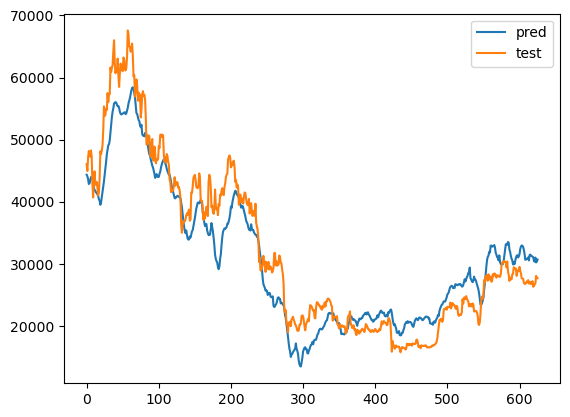

In [190]:
plt.plot(pred_df['BTC_Close'], label = 'pred')
plt.plot(test_df['BTC_Close'], label = 'test')
plt.legend()

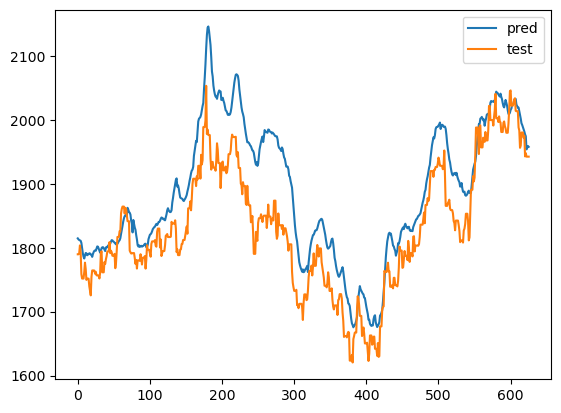

In [192]:
plt.plot(pred_df['gold_Open'], label = 'pred')
plt.plot(test_df['gold_Open'], label = 'test')
plt.legend()